In [1]:
!pip install scrublet

In [2]:
import scrublet as scr
import scipy.io as sp
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
#read in the expression matrix and make sure that the dimensions are in cells x genes
mat = sp.mmread("UMI_count_filt.mtx")
mat

<50070x58347 sparse matrix of type '<class 'numpy.int64'>'
	with 90359528 stored elements in COOrdinate format>

In [5]:
#input the collision rate from the birthday problem into the expected doublet rate
scrub = scr.Scrublet(mat, expected_doublet_rate=0.04)

In [6]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.75
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 1.7%
Elapsed time: 278.9 seconds


In [9]:
scrub.call_doublets(threshold=0.4)

Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 10.4%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 3.1%


array([False, False, False, ..., False, False, False])

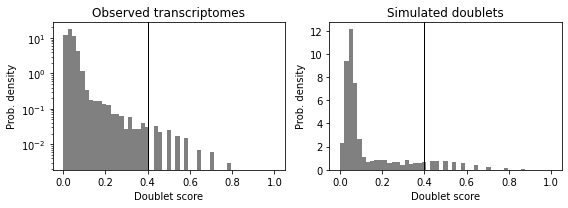

In [10]:
scrub.plot_histogram()[0].savefig("scrublet_histogram.png");

In [11]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.1))

print('Done.')

Running UMAP...


/Users/rossgiglio/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/rossgiglio/opt/anaconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Done.


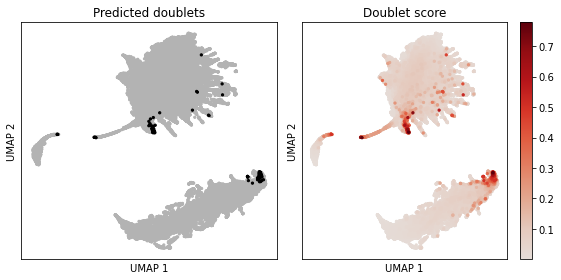

In [12]:
scrub.plot_embedding('UMAP', order_points=True)[0].savefig("UMAP_doublets.png");


In [13]:
np.savetxt(fname = "doublet_scores.txt", X = doublet_scores)
np.savetxt(fname = "predicted_doublets.txt", X = predicted_doublets)